In [1]:
import matplotlib.pyplot as plt
import numpy as np


# read data into memory
data_set_train = np.genfromtxt("hw04_data_set_train.csv", delimiter = ",", skip_header = 1)
data_set_test = np.genfromtxt("hw04_data_set_test.csv", delimiter = ",", skip_header = 1)

# get x and y values
X_train = data_set_train[:, 0:1]
y_train = data_set_train[:, 1]
X_test = data_set_test[:, 0:1]
y_test = data_set_test[:, 1]

# set drawing parameters
minimum_value = 1.5
maximum_value = 5.1
step_size = 0.001
X_interval = np.arange(start = minimum_value, stop = maximum_value + step_size, step = step_size)
X_interval = X_interval.reshape(len(X_interval), 1)

def plot_figure(X_train, y_train, X_test, y_test, X_interval, y_interval_hat):
    fig = plt.figure(figsize = (8, 4))
    plt.plot(X_train[:, 0], y_train, "b.", markersize = 10)
    plt.plot(X_test[:, 0], y_test, "r.", markersize = 10)
    plt.plot(X_interval[:, 0], y_interval_hat, "k-")
    plt.xlabel("Eruption time (min)")
    plt.ylabel("Waiting time to next eruption (min)")
    plt.legend(["training", "test"])
    plt.show()
    return(fig)

In [9]:
# STEP 2
# should return necessary data structures for trained tree
def decision_tree_regression_train(X_train, y_train, P):
    # create necessary data structures
    node_indices = {}
    is_terminal = {}
    need_split = {}

    node_features = {}
    node_splits = {}
    node_means = {}
    # your implementation starts below
    node_indices[1] = np.array(range(len(y_train)))
    is_terminal[1] = False
    need_split[1] = True

    while True:
        split_nodes = [key for key, value in need_split.items() if value == True]

        if (len(split_nodes) == 0):
            break

        for split_node in split_nodes:
            data_indices = node_indices[split_node]

            need_split[split_node] = False
            node_means[split_node] = np.mean(y_train[data_indices])
            
            # Pruning rule
            if (len(data_indices) <= P):
                is_terminal[split_node] = True
                continue
            is_terminal[split_node] = False
            # Only a single feature
            data_positions = np.sort(np.unique(X_train[data_indices]))
            split_positions = (data_positions[1:] + data_positions[:-1]) / 2
            split_scores = np.repeat(0.0, len(split_positions))
            X_reshaped = X_train[:, 0]

            # Go over all split positions
            for s in range(len(split_positions)):
                left_x_points = data_indices[X_reshaped[data_indices] > split_positions[s]]
                right_x_points = data_indices[X_reshaped[data_indices] <= split_positions[s]]
                left_y_points = y_train[left_x_points]
                right_y_points = y_train[right_x_points]
                left_prediction = np.mean(y_train[left_x_points])
                right_prediction = np.mean(y_train[right_x_points])

                Nm = len(data_indices)
                error = (1 / Nm) * (np.sum((left_y_points - left_prediction) ** 2) + np.sum((right_y_points - right_prediction) ** 2))
                split_scores[s] = error

            best_split = split_positions[np.argmin(split_scores)]
            
            # decide where to split
            #node_features[split_node] = best_split
            node_features[split_node] = 0
            node_splits[split_node] = best_split

            # create left node using the selected split
            left_indices = data_indices[X_reshaped[data_indices] > best_split]
            node_indices[2 * split_node] = left_indices

            is_terminal[2 * split_node] = False
            need_split[2 * split_node] = True
      
            # create right node using the selected split
            right_indices = data_indices[X_reshaped[data_indices] <= best_split]
            node_indices[2 * split_node + 1] = right_indices
            
            is_terminal[2 * split_node + 1] = False
            need_split[2 * split_node + 1] = True

    # your implementation ends above
    return(is_terminal, node_features, node_splits, node_means)

In [16]:
# STEP 3
# assuming that there are N query data points
# should return a numpy array with shape (N,)
def decision_tree_regression_test(X_query, is_terminal, node_features, node_splits, node_means):
    # your implementation starts below
    N_query = len(X_query)
    y_hat = np.repeat(0.0, N_query)
    for i in range(N_query):
        index = 1
        while True:
            if is_terminal[index] == True:
                y_hat[i] = node_means[index]
                break
            else:
                if X_query[i] > node_splits[index]:
                    index = 2 * index
                else:
                    index = 2 * index + 1
    # your implementation ends above
    return(y_hat)

In [17]:
# STEP 4
# assuming that there are T terminal node
# should print T rule sets as described
def extract_rule_sets(is_terminal, node_features, node_splits, node_means):
    # your implementation starts below
    terminal_nodes = [key for key, value in is_terminal.items()
                  if value == True]
    for terminal_node in terminal_nodes:
        index = terminal_node
        rules = np.array([])
        while index > 1:
            parent = np.floor(index / 2)
            if index % 2 == 0:
                # if node is left child of its parent
                rules = np.append(rules, 
                                  "x{:d} > {:.2f}".format(node_features[parent] + 1,
                                                          node_splits[parent]))
            else:
                # if node is right child of its parent
                rules = np.append(rules,
                                  "x{:d} <= {:.2f}".format(node_features[parent] + 1,
                                                           node_splits[parent]))
            index = parent
        rules = np.flip(rules)
        print("Node {:02}: {} => {}".format(terminal_node, rules, node_means[terminal_node]))
    # your implementation ends above

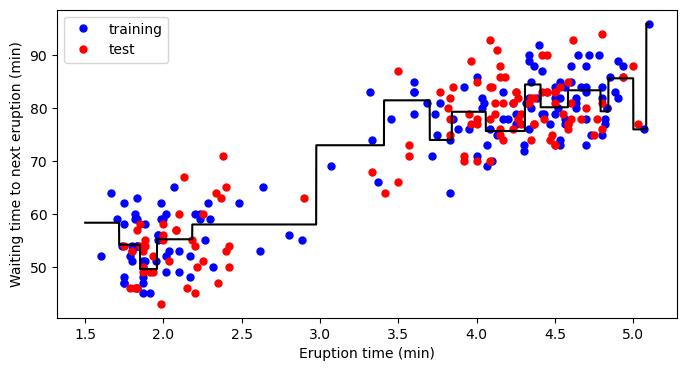

RMSE on training set is 4.43291764487832 when P is 20
RMSE on test set is 6.714228091718778 when P is 20


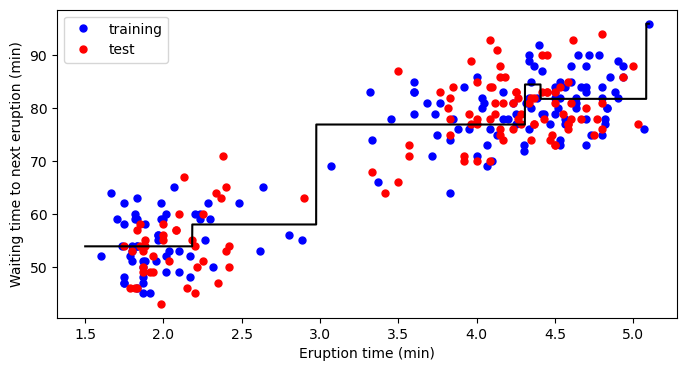

RMSE on training set is 5.00414678298864 when P is 50
RMSE on test set is 6.328291469197311 when P is 50
Node 05: ['x1 > 2.98' 'x1 <= 4.31'] => 76.92105263157895
Node 06: ['x1 <= 2.98' 'x1 > 2.18'] => 58.0
Node 07: ['x1 <= 2.98' 'x1 <= 2.18'] => 53.86363636363637
Node 08: ['x1 > 2.98' 'x1 > 4.31' 'x1 > 5.08'] => 96.0
Node 18: ['x1 > 2.98' 'x1 > 4.31' 'x1 <= 5.08' 'x1 > 4.41'] => 81.77777777777777
Node 19: ['x1 > 2.98' 'x1 > 4.31' 'x1 <= 5.08' 'x1 <= 4.41'] => 84.5


In [18]:
P = 20
is_terminal, node_features, node_splits, node_means = decision_tree_regression_train(X_train, y_train, P)
y_interval_hat = decision_tree_regression_test(X_interval, is_terminal, node_features, node_splits, node_means)
fig = plot_figure(X_train, y_train, X_test, y_test, X_interval, y_interval_hat)
fig.savefig("decision_tree_regression_{}.pdf".format(P), bbox_inches = "tight")

y_train_hat = decision_tree_regression_test(X_train, is_terminal, node_features, node_splits, node_means)
rmse = np.sqrt(np.mean((y_train - y_train_hat)**2))
print("RMSE on training set is {} when P is {}".format(rmse, P))

y_test_hat = decision_tree_regression_test(X_test, is_terminal, node_features, node_splits, node_means)
rmse = np.sqrt(np.mean((y_test - y_test_hat)**2))
print("RMSE on test set is {} when P is {}".format(rmse, P))

P = 50
is_terminal, node_features, node_splits, node_means = decision_tree_regression_train(X_train, y_train, P)
y_interval_hat = decision_tree_regression_test(X_interval, is_terminal, node_features, node_splits, node_means)
fig = plot_figure(X_train, y_train, X_test, y_test, X_interval, y_interval_hat)
fig.savefig("decision_tree_regression_{}.pdf".format(P), bbox_inches = "tight")

y_train_hat = decision_tree_regression_test(X_train, is_terminal, node_features, node_splits, node_means)
rmse = np.sqrt(np.mean((y_train - y_train_hat)**2))
print("RMSE on training set is {} when P is {}".format(rmse, P))
rmse = np.sqrt(np.mean((y_train - y_train_hat)**2))

y_test_hat = decision_tree_regression_test(X_test, is_terminal, node_features, node_splits, node_means)
rmse = np.sqrt(np.mean((y_test - y_test_hat)**2))
print("RMSE on test set is {} when P is {}".format(rmse, P))

extract_rule_sets(is_terminal, node_features, node_splits, node_means)